In [2]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
import sklearn

In [3]:
sorted(sklearn.neighbors.VALID_METRICS['brute'])

['braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'correlation',
 'cosine',
 'cosine',
 'dice',
 'euclidean',
 'hamming',
 'haversine',
 'jaccard',
 'kulsinski',
 'l1',
 'l2',
 'mahalanobis',
 'manhattan',
 'matching',
 'minkowski',
 'nan_euclidean',
 'precomputed',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'wminkowski',
 'yule']

In [5]:
import pandas as pd
data = pd.read_csv("C:\\Python\\Python38\\Projects\\Clinical_Trials\\new_dict\\6.1.21_tSNE_with_descriptions.csv")
D_names = data[["D_Name","Disease code"]]
del [data["Group_Description"],data["Study_Name"],data["D_Name"]]

data["Study"] = data["Study"].astype("category")
data["Disease code"] = data["Disease code"].astype("category")
data["Group"] = data["Group"].astype("category")
print(data)
print(data.info())

                 Disease code  Weight          Group        Study
0                     D009026    4.17  NCT00090545-2  NCT00090545
1                     D064420    9.09  NCT00090545-1  NCT00090545
2                     D064420   25.00  NCT00090545-2  NCT00090545
3                     D003248    4.17  NCT00090545-2  NCT00090545
4                     D003681    4.17  NCT00090545-2  NCT00090545
...                       ...     ...            ...          ...
18657                 D004761   11.11  NCT03135028-1  NCT03135028
18658              D000069544   11.11  NCT03135028-1  NCT03135028
18659                 D011014   11.11  NCT03135028-1  NCT03135028
18660  UNKNOWN-check-for-typo   11.11  NCT03135028-1  NCT03135028
18661                 D003920   11.11  NCT03135028-1  NCT03135028

[18662 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18662 entries, 0 to 18661
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        -----------

In [6]:
tsne_data = data.pivot_table('Weight', ["Disease code"], 'Group',fill_value=0.0)
tsne_data

Group                   NCT00003896-1  NCT00005908-1  NCT00006184-1  \
Disease code                                                          
10000060                          0.0           0.00            0.0   
10000636                          0.0           0.00            0.0   
10001497                          0.0           0.00            0.0   
10001551                          0.0           0.00            0.0   
10001675                          0.0           0.00            0.0   
...                               ...            ...            ...   
D065227                           0.0           0.00            0.0   
D065467                           0.0           0.00            0.0   
D065631                           0.0           0.00            0.0   
D065634                           0.0           0.00            0.0   
UNKNOWN-check-for-typo            0.0           3.33            0.0   

Group                   NCT00006721-2  NCT00006721-3  NCT00011986-1  \
Disease code                                                          
10000060                          0.0            0.0            0.0   
10000636                          0.0            0.0            0.0   
10001497                          0.0            0.0            0.0   
10001551                          0.0            0.0            0.0   
10001675                          0.0            0.0            0.0   
...                               ...            ...            ...   
D065227                           0.0            0.0            0.0   
D065467                           0.0            0.0            0.0   
D065631                           0.0            0.0            0.0   
D065634                           0.0            0.0            0.0   
UNKNOWN-check-for-typo            0.0            0.0            0.0   

Group                   NCT00011986-2  NCT00011986-3  NCT00011986-4  \
Disease code                                                          
10000060                         0.00            0.0            0.0   
10000636                         0.00            0.0            0.0   
10001497                         0.00            0.0            0.0   
10001551                         0.00            0.0            0.0   
10001675                         0.00            0.0            0.0   
...                               ...            ...            ...   
D065227                          0.00            0.0            0.0   
D065467                          0.00            0.0            0.0   
D065631                          0.00            0.0            0.0   
D065634                          0.00            0.0            0.0   
UNKNOWN-check-for-typo           0.13            0.0            0.0   

Group                   NCT00011986-5  ...  NCT03003520-1  NCT03003520-2  \
Disease code                           ...                                 
10000060                          0.0  ...           0.00            0.0   
10000636                          0.0  ...           0.00            0.0   
10001497                          0.0  ...           0.00            0.0   
10001551                          0.0  ...           0.00            0.0   
10001675                          0.0  ...           0.00            0.0   
...                               ...  ...            ...            ...   
D065227                           0.0  ...           0.00            0.0   
D065467                           0.0  ...           0.00            0.0   
D065631                           0.0  ...           0.00            0.0   
D065634                           0.0  ...           0.00            0.0   
UNKNOWN-check-for-typo            0.0  ...           2.33            0.0   

Group                   NCT03023878-1  NCT03135028-1  NCT03211117-1  \
Disease code                                                          
10000060                         0.00           0.00            0.0   
10000636                  

## Silhouette_score based on perplexity

In [6]:
for i in range(1,6):
    X_embedded = TSNE(n_components=2,
    perplexity =i,early_exaggeration=12, metric="cosine").fit_transform(tsne_data)
    db = DBSCAN(eps=3, min_samples=2,algorithm="ball_tree").fit(X_embedded)
    ss = silhouette_score(X_embedded, db.labels_)
    print("Perplexity=",i,"silhouette_score=",ss)

for i in range(5,56,5):
    X_embedded = TSNE(n_components=2,
    perplexity =i,early_exaggeration=12, metric="cosine").fit_transform(tsne_data)
    db = DBSCAN(eps=3, min_samples=2,algorithm="ball_tree").fit(X_embedded)
    ss = silhouette_score(X_embedded, db.labels_)
    print("Perplexity=",i,"silhouette_score=",ss)

Perplexity= 1 silhouette_score= 0.79864043
Perplexity= 2 silhouette_score= 0.7553599
Perplexity= 3 silhouette_score= 0.7289187
Perplexity= 4 silhouette_score= 0.7118971
Perplexity= 5 silhouette_score= 0.6967944
Perplexity= 5 silhouette_score= 0.6882756
Perplexity= 10 silhouette_score= 0.6345508
Perplexity= 15 silhouette_score= 0.52373326
Perplexity= 20 silhouette_score= 0.49438217


KeyboardInterrupt: 

## Silhouette_score based on perplexity (standardized)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(tsne_data)

for i in range(1,6):
    X_embedded = TSNE(n_components=2,
    perplexity =i,early_exaggeration=12, metric="cosine").fit_transform(scaled_samples)
    db = DBSCAN(eps=3, min_samples=2,algorithm="ball_tree").fit(X_embedded)
    ss = silhouette_score(X_embedded, db.labels_)
    print("Perplexity=",i,"silhouette_score=",ss)
for i in range(5,56,5):
    X_embedded = TSNE(n_components=2,
    perplexity =i,early_exaggeration=12, metric="cosine").fit_transform(scaled_samples)
    db = DBSCAN(eps=3, min_samples=2,algorithm="ball_tree").fit(X_embedded)
    ss = silhouette_score(X_embedded, db.labels_)
    print("Perplexity=",i,"silhouette_score=",ss)

Perplexity= 1 silhouette_score= 0.8126477
Perplexity= 2 silhouette_score= 0.7933172
Perplexity= 3 silhouette_score= 0.7547159
Perplexity= 4 silhouette_score= 0.71807116
Perplexity= 5 silhouette_score= 0.72628903
Perplexity= 5 silhouette_score= 0.73204166
Perplexity= 10 silhouette_score= 0.6277355
Perplexity= 15 silhouette_score= 0.5587716
Perplexity= 20 silhouette_score= 0.47340876
Perplexity= 25 silhouette_score= 0.41862926
Perplexity= 30 silhouette_score= 0.33143935
Perplexity= 35 silhouette_score= 0.23266993
Perplexity= 40 silhouette_score= 0.24636377
Perplexity= 45 silhouette_score= 0.08334417
Perplexity= 50 silhouette_score= 0.14542176
Perplexity= 55 silhouette_score= -0.010246055


## Tsne Without standardization and PCA

(1681, 2)
318


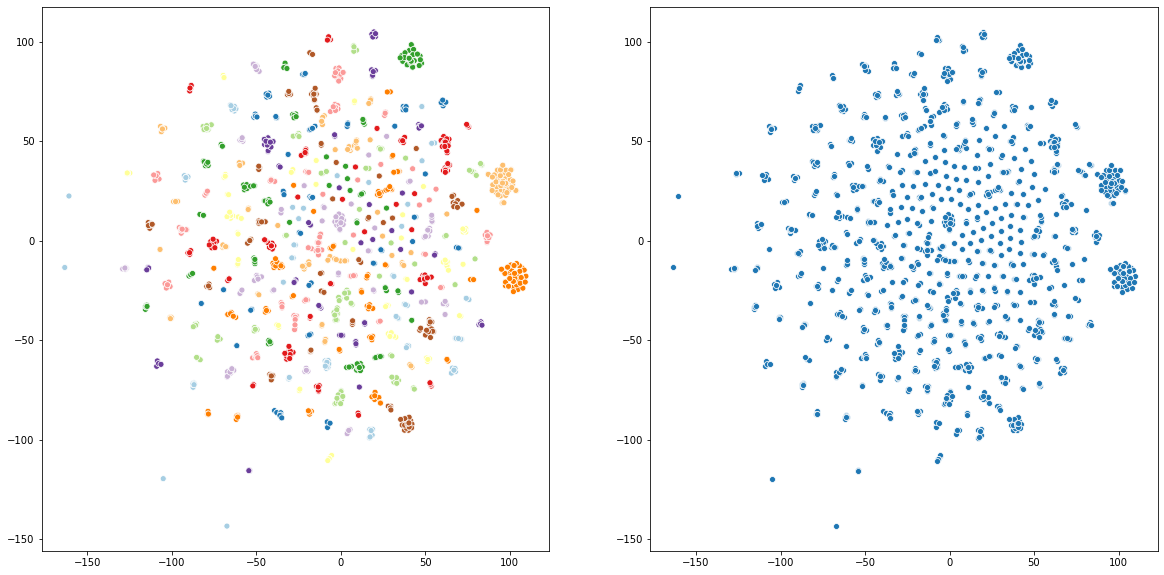

In [89]:
# Without pca and strandization
from matplotlib.pyplot import figure

X_embedded = TSNE(n_components=2,
perplexity =1,early_exaggeration=12, metric="cosine").fit_transform(tsne_data)
print(X_embedded.shape)

db = DBSCAN(eps=4, min_samples=2,algorithm="ball_tree").fit(X_embedded)
print(len(np.unique(db.labels_)))

x = X_embedded[:,0]
y = X_embedded[:,1]

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))
sns.scatterplot(x=x,y=y,  ax =ax2)

sns.scatterplot(x=x,y=y, hue =db.labels_, ax =ax1,palette="Paired")
ax1.get_legend().remove()

plt.show()

## Conditionlara labelleri atama

In [90]:
not_pca_data = D_names.drop_duplicates("Disease code").sort_values("Disease code")
not_pca_data["DB_Labels"] = [i for i in db.labels_]
print(len(not_pca_data["DB_Labels"].unique()), "labels")
not_pca_data

318 labels


D_Name  \
71                                abdominal distension   
1818   activated partial thromboplastin time prolonged   
2707                                         agitation   
22                  alanine aminotransferase increased   
23                      alkaline phosphatase increased   
...                                                ...   
7977                              transfusion reaction   
17980           transcatheter aortic valve replacement   
5277                                 allergic rhinitis   
2680                       cerebrospinal fluid leakage   
291                                                D00   

                 Disease code  DB_Labels  
71                   10000060          0  
1818                 10000636          1  
2707                 10001497          2  
22                   10001551          2  
23                   10001675          3  
...                       ...        ...  
7977                  D065227         30  
17980                 D065467         14  
5277                  D065631        106  
2680                  D065634        156  
291    UNKNOWN-check-for-typo         51  

[1681 rows x 3 columns]

## Orange ile karşılaştırma

In [91]:

diseases_to_check = ["D018798", "D004347", "D016535", "D012804", "D015451"]
print(not_pca_data[not_pca_data["Disease code"].isin(diseases_to_check)],"\n")

diseases_to_check = ["D007402", "D012220","D017541", "D001924"]
print(not_pca_data[not_pca_data["Disease code"].isin(diseases_to_check)])

diseases_to_check = ["10048762", "D005891","D015414", "10003012", "D000140", "D008708", "10003012", "D010494"]
print(not_pca_data[not_pca_data["Disease code"].isin(diseases_to_check)])

                             D_Name Disease code  DB_Labels
14292              drug interaction      D004347         54
14141           sick sinus syndrome      D012804         54
14682  lymphocytic leukemia chronic      D015451         54
14890     bronchial hyperreactivity      D016535         54
14070        anemia iron-deficiency      D018798         54 

                 D_Name Disease code  DB_Labels
14485  brain concussion      D001924         87
7779         intertrigo      D007402        256
9729           rhinitis      D012220         54
9310     pseudoaneurysm      D017541         54
                          D_Name Disease code  DB_Labels
5684     appendicitis perforated     10003012          6
264              tooth infection     10048762        104
11043            lactic acidosis      D000140        200
15673                 gingivitis      D005891        104
11046          methemoglobinemia      D008708        200
18213  constrictive pericarditis      D010494          6

## PCA (PCA nedeniyle cluster'a eklenmeyen conditionlar olabiliyor)

In [75]:
pca = PCA(n_components=40)
X_pca = pca.fit_transform(tsne_data)
for i in range(1,6):
    X_embedded = TSNE(n_components=2,
    perplexity =i,early_exaggeration=12, metric="cosine").fit_transform(X_pca)
    db = DBSCAN(eps=3, min_samples=2,algorithm="ball_tree").fit(X_embedded)
    ss = silhouette_score(X_embedded, db.labels_)
    print("Perplexity=",i,"silhouette_score=",ss)

Perplexity= 1 silhouette_score= 0.7852201
Perplexity= 2 silhouette_score= 0.73819256
Perplexity= 3 silhouette_score= 0.6984881
Perplexity= 4 silhouette_score= 0.6922099
Perplexity= 5 silhouette_score= 0.667235


## TSNE with PCA 

(1681, 2)
310


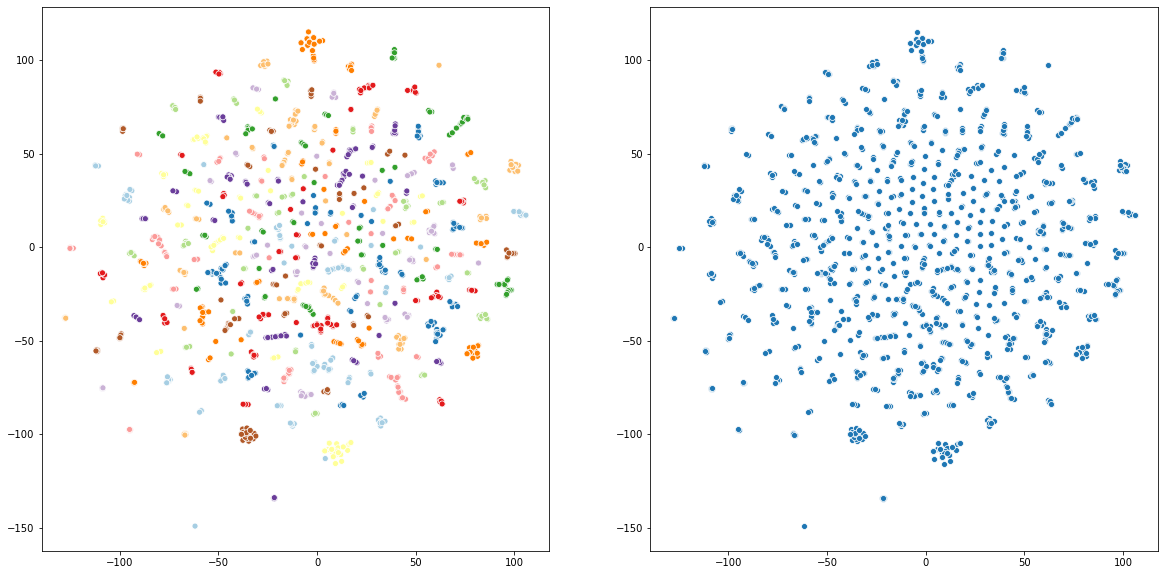

In [92]:
pca = PCA(n_components=40)
X_pca = pca.fit_transform(tsne_data)

X_embedded = TSNE(n_components=2,learning_rate=200,
perplexity =1,early_exaggeration=12, metric="cosine").fit_transform(X_pca)
print(X_embedded.shape)

db = DBSCAN(eps=4, min_samples=2,algorithm="ball_tree").fit(X_embedded)
print(len(np.unique(db.labels_)))

x = X_embedded[:,0]
y = X_embedded[:,1]

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))
sns.scatterplot(x=x,y=y,  ax =ax2)

sns.scatterplot(x=x,y=y, hue =db.labels_, ax =ax1,palette="Paired")
ax1.get_legend().remove()

plt.show()

## PCA data with labels

In [93]:
pca_data=D_names.drop_duplicates("Disease code").sort_values("Disease code")
pca_data["DB_Labels"] = [i for i in db.labels_]
print(len(pca_data["DB_Labels"].unique()), "labels")
pca_data.sort_values("DB_Labels")

310 labels


D_Name Disease code  DB_Labels
1995               irritable bowel syndrome      D043183         -1
14670                        brain neoplasm      D001932         -1
71                     abdominal distension     10000060          0
1707                                rupture      D012421          0
8104                          lymphadenitis      D008199          0
...                                     ...          ...        ...
13838                    herpetic keratitis      D016849        307
13881  staphylococcal scalded skin syndrome      D013206        307
3228                   platelet transfusion      D017713        307
6837                        thromboembolism      D013923        308
6584                            pelvic pain      D017699        308

[1681 rows x 3 columns]

In [94]:
diseases_to_check = ["D018798", "D004347", "D016535", "D012804", "D015451"]
print(pca_data[pca_data["Disease code"].isin(diseases_to_check)],"\n")

diseases_to_check = ["D007402", "D012220","D017541", "D001924"]
print(pca_data[pca_data["Disease code"].isin(diseases_to_check)])

diseases_to_check = ["10048762", "D005891","D015414", "10003012", "D000140", "D008708", "10003012", "D010494"]
print(pca_data[pca_data["Disease code"].isin(diseases_to_check)])


                             D_Name Disease code  DB_Labels
14292              drug interaction      D004347         57
14141           sick sinus syndrome      D012804         57
14682  lymphocytic leukemia chronic      D015451         57
14890     bronchial hyperreactivity      D016535         57
14070        anemia iron-deficiency      D018798         57 

                 D_Name Disease code  DB_Labels
14485  brain concussion      D001924        163
7779         intertrigo      D007402        249
9729           rhinitis      D012220        169
9310     pseudoaneurysm      D017541        217
                          D_Name Disease code  DB_Labels
5684     appendicitis perforated     10003012          7
264              tooth infection     10048762         79
11043            lactic acidosis      D000140        194
15673                 gingivitis      D005891        194
11046          methemoglobinemia      D008708        194
18213  constrictive pericarditis      D010494        178

## Scaled data with PCA

(1681, 2)
185


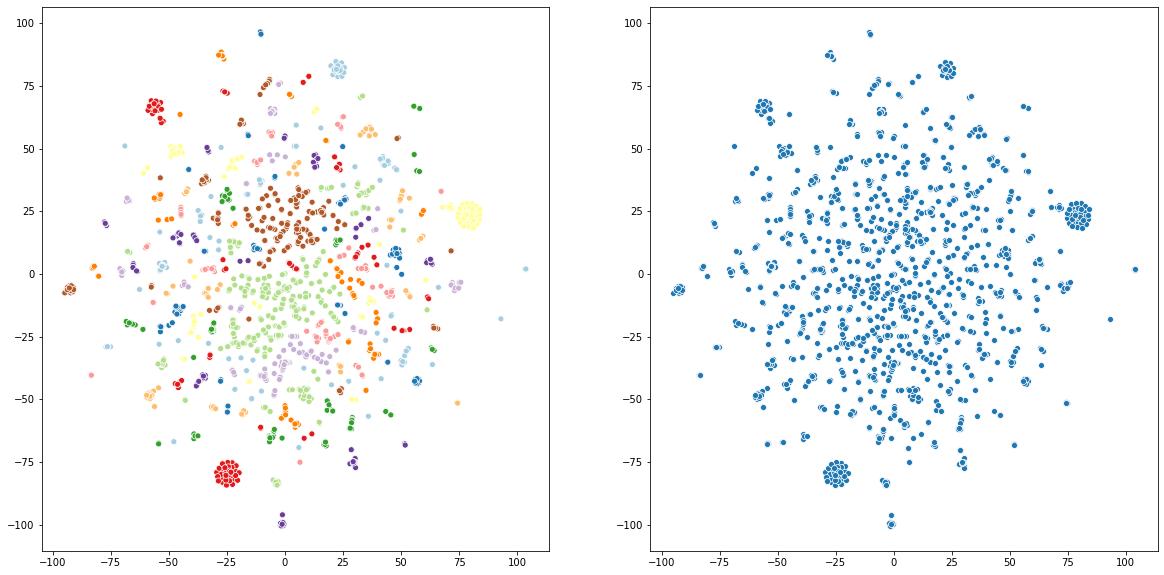

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(tsne_data)

pca = PCA(n_components=40)
X_pca = pca.fit_transform(scaled_samples)

X_embedded = TSNE(n_components=2,
perplexity =4,early_exaggeration=120, metric="cosine").fit_transform(X_pca)
print(X_embedded.shape)

db = DBSCAN(eps=4, min_samples=2,algorithm="ball_tree").fit(X_embedded)
print(len(np.unique(db.labels_)))

x = X_embedded[:,0]
y = X_embedded[:,1]

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))
sns.scatterplot(x=x,y=y,  ax =ax2)

sns.scatterplot(x=x,y=y, hue =db.labels_, ax =ax1,palette="Paired")
ax1.get_legend().remove()

plt.show()

In [6]:
scaled_pca_data=D_names.drop_duplicates("Disease code").sort_values("Disease code")
scaled_pca_data["DB_Labels"] = [i for i in db.labels_]
print(len(scaled_pca_data["DB_Labels"].unique()), "labels")
scaled_pca_data.sort_values("DB_Labels")

185 labels


D_Name Disease code  DB_Labels
15673               gingivitis      D005891         -1
814    spinal cord compression      D013117         -1
2710                  delirium      D003693         -1
9677              epiglottitis      D004826         -1
2204         failure to thrive      D005183         -1
...                        ...          ...        ...
8097             bone fracture      D050723        181
13530              portal vein      D011169        182
13528                 pancreas      D010179        182
900       deep vein thrombosis      D020246        183
842         pulmonary embolism      D011655        183

[1681 rows x 3 columns]

In [149]:
diseases_to_check = ["D018798", "D004347", "D016535", "D012804", "D015451"]
print(scaled_pca_data[scaled_pca_data["Disease code"].isin(diseases_to_check)],"\n")

diseases_to_check = ["D007402", "D012220","D017541", "D001924"]
print(scaled_pca_data[scaled_pca_data["Disease code"].isin(diseases_to_check)])

diseases_to_check = ["10048762", "D005891","D015414", "10003012", "D000140", "D008708", "10003012", "D010494"]
print(scaled_pca_data[scaled_pca_data["Disease code"].isin(diseases_to_check)])

                             D_Name Disease code  DB_Labels
14292              drug interaction      D004347         55
14141           sick sinus syndrome      D012804         55
14682  lymphocytic leukemia chronic      D015451         55
14890     bronchial hyperreactivity      D016535         55
14070        anemia iron-deficiency      D018798         55 

                 D_Name Disease code  DB_Labels
14485  brain concussion      D001924         55
7779         intertrigo      D007402         55
9729           rhinitis      D012220         55
9310     pseudoaneurysm      D017541         55
                          D_Name Disease code  DB_Labels
5684     appendicitis perforated     10003012          6
264              tooth infection     10048762        107
11043            lactic acidosis      D000140        190
15673                 gingivitis      D005891        190
11046          methemoglobinemia      D008708        190
18213  constrictive pericarditis      D010494         80

## TSNE scaled without PCA

(1681, 2)
338


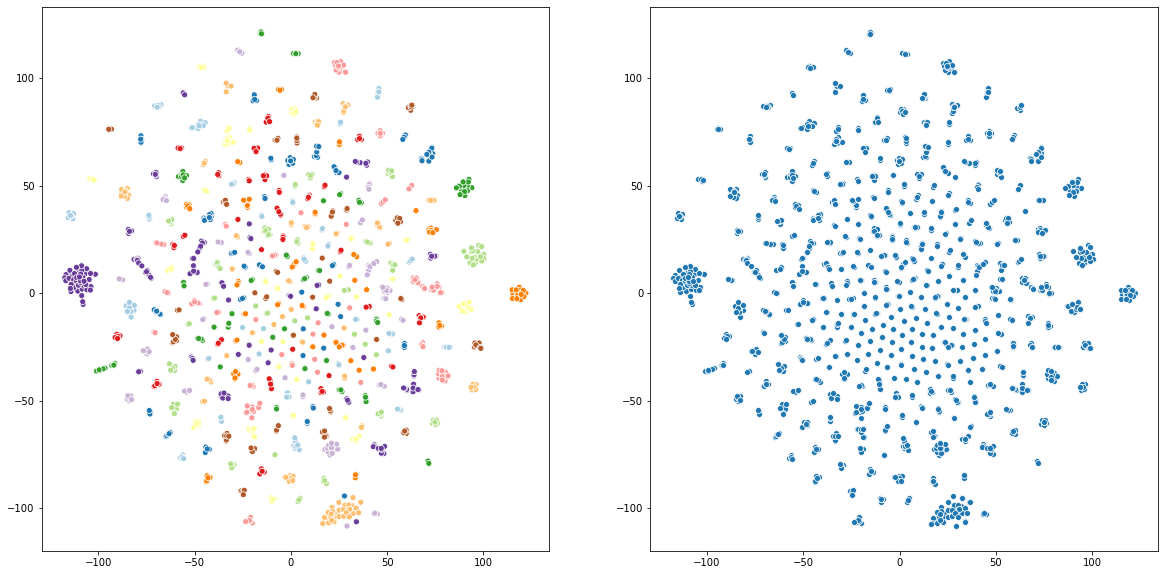

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(tsne_data)

X_embedded = TSNE(n_components=2,
perplexity =1,early_exaggeration=12, metric="cosine").fit_transform(scaled_samples)
print(X_embedded.shape)

db = DBSCAN(eps=4, min_samples=2,algorithm="ball_tree").fit(X_embedded)
print(len(np.unique(db.labels_)))

x = X_embedded[:,0]
y = X_embedded[:,1]

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))
sns.scatterplot(x=x,y=y,  ax =ax2)

sns.scatterplot(x=x,y=y, hue =db.labels_, ax =ax1,palette="Paired")
ax1.get_legend().remove()

plt.show()

In [8]:
scaled_nopca_data=D_names.drop_duplicates("Disease code").sort_values("Disease code")
scaled_nopca_data["DB_Labels"] = [i for i in db.labels_]
print(len(scaled_nopca_data["DB_Labels"].unique()), "labels")
scaled_nopca_data.sort_values("DB_Labels")

338 labels


D_Name Disease code  DB_Labels
71           abdominal distension     10000060          0
1694     hepatocellular carcinoma      D006528          0
1707                      rupture      D012421          0
3554                    magnesium      D008274          1
117                 blood glucose      D001786          1
...                           ...          ...        ...
764                 drug overdose      D062787        336
5991                   lower limb      D035002        336
806      cerebrovascular accident      D020521        337
9351            colorectal cancer      D015179        337
1176  primary exertional headache      D051270        337

[1681 rows x 3 columns]

In [9]:
diseases_to_check = ["D018798", "D004347", "D016535", "D012804", "D015451"]
print(scaled_nopca_data[scaled_nopca_data["Disease code"].isin(diseases_to_check)],"\n")

diseases_to_check = ["D007402", "D012220","D017541", "D001924"]
print(scaled_nopca_data[scaled_nopca_data["Disease code"].isin(diseases_to_check)],"\n")

diseases_to_check = ["10048762", "D005891","D015414", "10003012", "D000140", "D008708", "10003012", "D010494"]
print(scaled_nopca_data[scaled_nopca_data["Disease code"].isin(diseases_to_check)])

                             D_Name Disease code  DB_Labels
14292              drug interaction      D004347         57
14141           sick sinus syndrome      D012804         57
14682  lymphocytic leukemia chronic      D015451         57
14890     bronchial hyperreactivity      D016535         57
14070        anemia iron-deficiency      D018798         57 

                 D_Name Disease code  DB_Labels
14485  brain concussion      D001924         57
7779         intertrigo      D007402        240
9729           rhinitis      D012220         57
9310     pseudoaneurysm      D017541         57 

                          D_Name Disease code  DB_Labels
5684     appendicitis perforated     10003012          7
264              tooth infection     10048762        114
11043            lactic acidosis      D000140         93
15673                 gingivitis      D005891        114
11046          methemoglobinemia      D008708         93
18213  constrictive pericarditis      D010494         

In [10]:
diseases_to_check = ["D001468", "D013922", "D004814","D013035", "D015878", "D013161"]
print(scaled_nopca_data[scaled_nopca_data["Disease code"].isin(diseases_to_check)])

                D_Name Disease code  DB_Labels
4693         thoracica      D001468        251
14947   epidermal cyst      D004814        251
14620    muscle spasms      D013035        251
10943  splenic rupture      D013161        333
14085   thrombocytosis      D013922        251
17249        mydriasis      D015878        251


In [12]:
diseases_to_check = ["D001468", "D013922", "D004814","D013035", "D015878", "D013161"]
print(not_pca_data[not_pca_data["Disease code"].isin(diseases_to_check)])

NameError: name 'not_pca_data' is not defined

In [13]:
scaled_nopca_data[scaled_nopca_data["D_Name"].str.contains("nausea")]

D_Name Disease code  DB_Labels
85                               nausea      D009325        194
2217  postoperative nausea and vomiting      D020250        156

In [14]:
scaled_nopca_data[scaled_nopca_data["DB_Labels"] == 194]

D_Name Disease code  DB_Labels
2312       cancer pain   D000072716        194
3         constipation      D003248        194
4          dehydration      D003681        194
14            headache      D006261        194
85              nausea      D009325        194
590   pleural effusion      D010996        194
89            vomiting      D014839        194
72      abdominal pain      D015746        194

In [15]:
scaled_nopca_data[scaled_nopca_data["D_Name"].str.contains("tooth")]

D_Name Disease code  DB_Labels
6435   tooth development disorder     10044030         88
264               tooth infection     10048762        114
14521              tooth fracture      D014082         57
6436                    toothache      D014098         33

In [17]:
scaled_nopca_data[scaled_nopca_data["DB_Labels"] == 114]

D_Name Disease code  DB_Labels
264    tooth infection     10048762        114
15673       gingivitis      D005891        114

In [7]:
data = pd.read_csv("C:\\Python\\Python38\\Projects\\Clinical_Trials\\new_dict\\6.1.21_tSNE_with_descriptions.csv")
data= data[["Study_Name","Group","Group_Description"]]
data = data.drop_duplicates("Group")

desc = pd.read_csv("C:\\Python\\Python38\\Projects\\Clinical_Trials\\new_dict\\05-01-Sorafenib_Doxorubicine_Cytarabine_node_descriptions.csv")
desc =  desc.rename(columns = {"Unnamed: 0":"Study"})
desc = desc.dropna()
desc = desc[desc["Study"].isin(tsne_data.columns)]
data = data.merge(desc,left_on='Group', right_on='Study')
data = data.sort_values("Group")
data["descriptions"]=data["descriptions"].str.lower()
data["title"]=data["title"].str.lower()
data

Study_Name          Group  \
127  S9912 Combination Chemo in Stage III Ovarian C...  NCT00003896-1   
128  Primary Chemotherapy With Docetaxel-Capecitabi...  NCT00005908-1   
129  Chemotherapy  Stem Cell Transplantation and Do...  NCT00006184-1   
130  S0016 Combination Chemotherapy With Monoclonal...  NCT00006721-2   
131  S0016 Combination Chemotherapy With Monoclonal...  NCT00006721-3   
..                                                 ...            ...   
499  PET-Directed Therapy With Pembrolizumab and Co...  NCT03226249-1   
500  A Study of Olaratumab (LY3012207)  Doxorubicin...  NCT03283696-1   
501  A Study of Olaratumab (LY3012207)  Doxorubicin...  NCT03283696-2   
502  A Study to Evaluate the Pharmacokinetics  Effi...  NCT03493854-1   
503  A Study to Evaluate the Pharmacokinetics  Effi...  NCT03493854-2   

                                     Group_Description          Study  \
127              Paclitaxel/CDDP/Liposomal Doxorubicin  NCT00003896-1   
128                     Docetaxel/Capecitabine - A & B  NCT00005908-1   
129                     Recipient - Chemotherapy Group  NCT00006184-1   
130                                   CHOP + Rituximab  NCT00006721-2   
131                                 CHOP + Tositumomab  NCT00006721-3   
..                                                 ...            ...   
499  Treatment: Pembrolizumab and AVD Chemotherapy ...  NCT03226249-1   
500     Olaratumab 15 mg/kg + Doxorubicin + Ifosfamide  NCT03283696-1   
501     Olaratumab 20 mg/kg + Doxorubicin + Ifosfamide  NCT03283696-2   
502  Arm A: Pertuzumab IV + Trastuzumab IV + Chemot...  NCT03493854-1   
503  Arm B: Pertuzumab and Trastuzumab FDC SC + Che...  NCT03493854-2   

                                                 title  \
127              paclitaxel/cddp/liposomal doxorubicin   
128                     docetaxel/capecitabine - a & b   
129                     recipient - chemotherapy group   
130                                   chop + rituximab   
131                                 chop + tositumomab   
..                                                 ...   
499  treatment: pembrolizumab and avd chemotherapy ...   
500     olaratumab 15 mg/kg + doxorubicin + ifosfamide   
501     olaratumab 20 mg/kg + doxorubicin + ifosfamide   
502  arm a: pertuzumab iv + trastuzumab iv + chemot...   
503  arm b: pertuzumab and trastuzumab fdc sc + che...   

                                          descriptions  
127                  description: no description found  
128  description: docetaxel/capecitabine - a- docet...  
129  description: induction chemotherapy with fluda...  
130  description: patients receive cyclophosphamide...  
131  description: patients receive cyclophosphamide...  
..                                                 ...  
499  description: all patients get 3 cycles (21-day...  
500  description: participants received olaratumab ...  
501  description: participants received olaratumab ...  
502  description: participants received 8 cycles of...  
503  description: participants received 8 cycles of...  

[700 rows x 6 columns]

(700, 2)


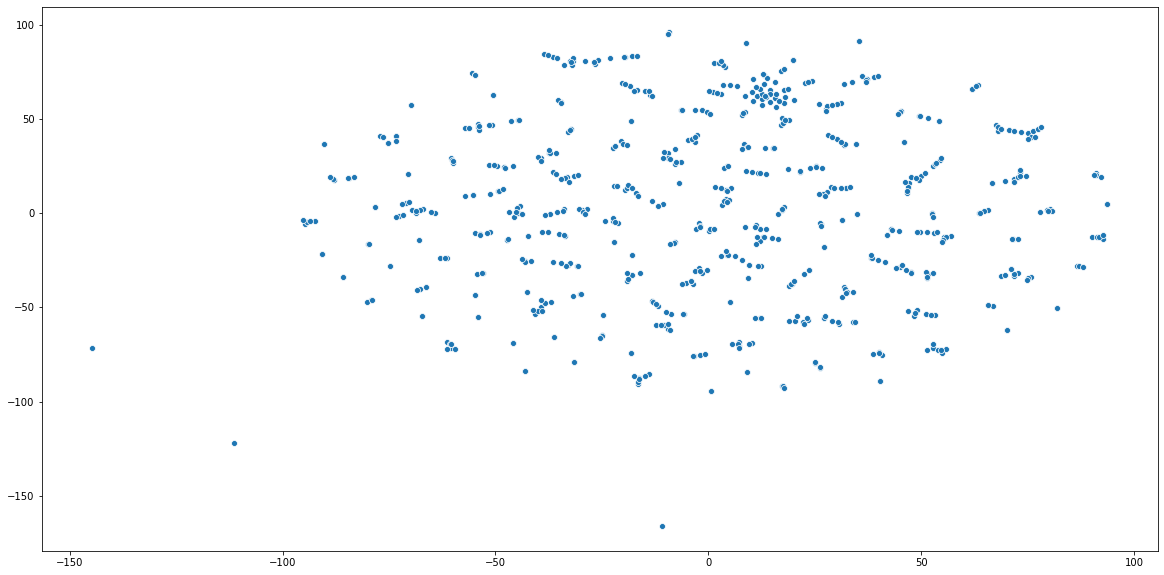

In [8]:
from sklearn.preprocessing import StandardScaler
transposed_data = tsne_data.transpose()


scaler = StandardScaler()
scaled_samples_t = scaler.fit_transform(transposed_data)

X_embedded = TSNE(n_components=2,
perplexity =1,early_exaggeration=12, metric="cosine").fit_transform(scaled_samples_t)
print(X_embedded.shape)


x = X_embedded[:,0]
y = X_embedded[:,1]




fig, ax1 = plt.subplots(figsize=(20, 10))


sns.scatterplot(x=x,y=y)


plt.show()

In [9]:
data.loc[(data["descriptions"].str.contains("sorafenib")| (data["title"].str.contains("sorafenib"))), 'color'] = 'sorafenib'
data.loc[(data["descriptions"].str.contains("doxorubicin") | (data["title"].str.contains("doxorubicin"))), 'color'] = 'doxorubicin'
data.loc[(data["descriptions"].str.contains("cytarabine") | (data["title"].str.contains("cytarabine"))), 'color'] = 'cytarabine'
data.loc[(data["descriptions"].str.contains("mk-8242") | (data["title"].str.contains("mk-8242"))), 'color'] = 'mk-8242'
data.loc[(data["descriptions"].str.contains("rituximab")| (data["title"].str.contains("rituximab"))), 'color'] = 'rituximab'
data.loc[(data["descriptions"].str.contains("trastuzumab")| (data["title"].str.contains("trastuzumab"))), 'color'] = 'trastuzumab'
data.loc[(data["descriptions"].str.contains("docetaxel")| (data["title"].str.contains("docetaxel"))), 'color'] = 'docetaxel'
data.loc[(data["descriptions"].str.contains("polatuzumab")| (data["title"].str.contains("polatuzumab"))), 'color'] = 'polatuzumab'
data.loc[(data["descriptions"].str.contains("glasdegib")| (data["title"].str.contains("glasdegib"))), 'color'] = 'glasdegib'
data.loc[(data["descriptions"].str.contains("nintedanib")| (data["title"].str.contains("nintedanib"))), 'color'] = 'nintedanib'
data.loc[(data["descriptions"].str.contains("ofatumumab")| (data["title"].str.contains("ofatumumab"))), 'color'] = 'ofatumumab'
data.loc[(data["descriptions"].str.contains("cyclophosphamide")| (data["title"].str.contains("cyclophosphamide"))), 'color'] = 'cyclophosphamide'
data.loc[(data["descriptions"].str.contains("olaratumab")| (data["title"].str.contains("olaratumab"))), 'color'] = 'olaratumab'
data.loc[(data["descriptions"].str.contains("vincristine")| (data["title"].str.contains("vincristine"))), 'color'] = 'vincristine'
data.loc[(data["descriptions"].str.contains("amg 531")| (data["title"].str.contains("amg 531"))), 'color'] = 'amg 531'
data.loc[(data["descriptions"].str.contains("chop")| (data["title"].str.contains("chop"))), 'color'] = 'chop'
data.loc[(data["descriptions"].str.contains("nivolumab")| (data["title"].str.contains("nivolumab"))), 'color'] = 'nivolumab'
data.loc[(data["descriptions"].str.contains("brentuximab")| (data["title"].str.contains("brentuximab"))), 'color'] = 'brentuximab'
data.loc[(data["descriptions"].str.contains("adriamycin")| (data["title"].str.contains("adriamycin"))), 'color'] = 'adriamycin'
data.loc[(data["descriptions"].str.contains("venetoclax")| (data["title"].str.contains("venetoclax"))), 'color'] = 'venetoclax'
data.loc[(data["descriptions"].str.contains("paclitaxel")| (data["title"].str.contains("paclitaxel"))), 'color'] = 'paclitaxel'
data.loc[(data["descriptions"].str.contains("sunitinib")| (data["title"].str.contains("sunitinib"))), 'color'] = 'sunitinib'
data.loc[(data["descriptions"].str.contains("bortezomib")| (data["title"].str.contains("bortezomib"))), 'color'] = 'bortezomib'
data.loc[(data["descriptions"].str.contains("hidac")| (data["title"].str.contains("hidac"))), 'color'] = 'cytarabine'
data.loc[(data["descriptions"].str.contains("gti-2040")| (data["title"].str.contains("gti-2040"))), 'color'] = 'gti-2040'
data.loc[(data["descriptions"].str.contains("rad001")| (data["title"].str.contains("rad001"))), 'color'] = 'rad001'
data.loc[(data["descriptions"].str.contains("cisplatin")| (data["title"].str.contains("cisplatin"))), 'color'] = 'cisplatin'
data.loc[(data["descriptions"].str.contains("dexamethasone")| (data["title"].str.contains("dexamethasone"))), 'color'] = 'dexamethasone'
data.loc[(data["descriptions"].str.contains("thalidomide")| (data["title"].str.contains("thalidomide"))), 'color'] = 'thalidomide'
data.loc[(data["descriptions"].str.contains("pazopanib")| (data["title"].str.contains("pazopanib"))), 'color'] = 'pazopanib'

data=data.fillna("k")


In [10]:
drugs = ["sorafenib", "doxorubicin", "cytarabine"]

found_drug = []
for group in range(data.shape[0]):
    for drug in drugs:
        if drug in data.loc[group,"descriptions"] or drug in data.loc[group,"title"]:
            found_drug.append(drug)
        data.loc[group, 'color'] = " & ".join(found_drug)
    found_drug=[]
        


In [11]:
found_drug = []
for i in drugs:
    if i in data.loc[127,"descriptions"] or i in data.loc[127,"title"]:
        found_drug.append(i)
print(" & ".join(found_drug))



doxorubicin


In [12]:
data.loc[18,"title"]

'intervention'

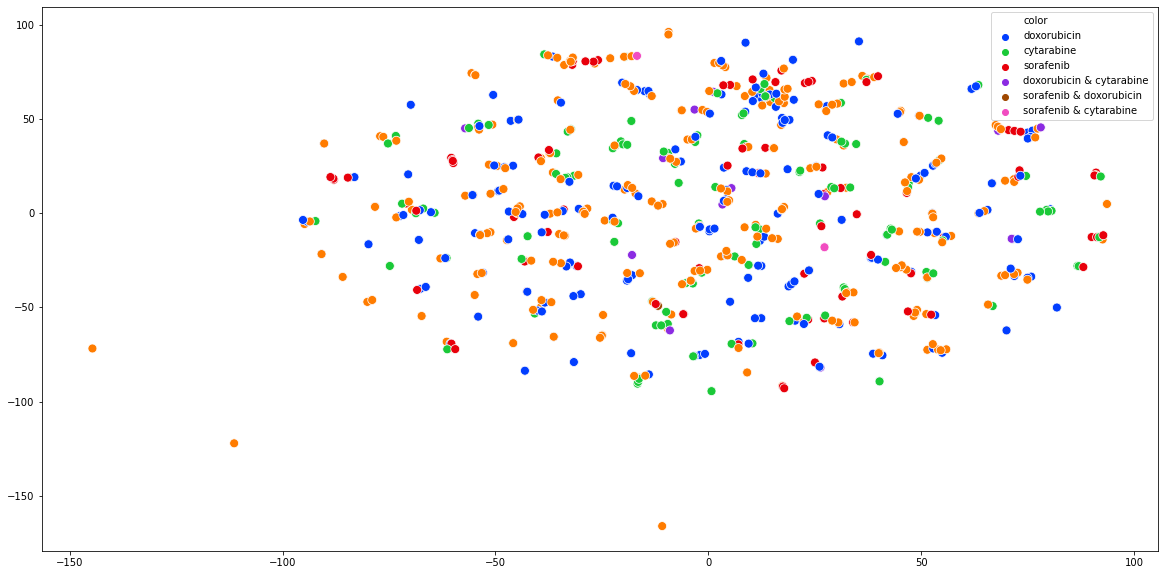

In [13]:
# cmap = plt.get_cmap('jet', 20)
# cmap.set_under('gray')
# fig, ax = plt.subplots(figsize=(20, 10))
# ax.scatter(x=x,y=y, c=data.color,s=60, cmap=cmap)
# plt.show()


fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x=x,y=y, hue =data.color, ax =ax, s=80,palette="bright")
plt.show()

# fig, ax = plt.subplots(figsize=(20, 10))
# sns.scatterplot(x=x,y=y, hue =data.color, ax =ax, s=80,palette="rocket")
# plt.show()

# fig, ax = plt.subplots(figsize=(20, 10))
# sns.scatterplot(x=x,y=y, hue =data.color, ax =ax, s=80,palette="bright")
# plt.show()


In [14]:
data = pd.read_csv("C:\\Python\\Python38\\Projects\\Clinical_Trials\\new_dict\\6.1.21_tSNE_with_descriptions.csv")
data= data[["Study_Name","Group","Group_Description"]]
data = data.drop_duplicates("Group")

desc = pd.read_csv("C:\\Python\\Python38\\Projects\\Clinical_Trials\\new_dict\\05-01-Sorafenib_Doxorubicine_Cytarabine_node_descriptions.csv")
desc =  desc.rename(columns = {"Unnamed: 0":"Study"})
desc = desc.dropna()
desc = desc[desc["Study"].isin(tsne_data.columns)]
data = data.merge(desc,left_on='Group', right_on='Study')
data = data.sort_values("Group")
data["descriptions"]=data["descriptions"].str.lower()
data["title"]=data["title"].str.lower()

In [15]:
drugs = ["sorafenib", "doxorubicin", "cytarabine",'mk-8242','rituximab','trastuzumab','docetaxel','polatuzumab','glasdegib',
         'nintedanib','ofatumumab','cyclophosphamide','olaratumab','vincristine','amg 531','nivolumab','brentuximab','adriamycin',
         'venetoclax','paclitaxel',"hidac",'sunitinib','bortezomib','gti-2040','rad001','cisplatin','dexamethasone','thalidomide','pazopanib',
        "capecitabine"]

found_drug = []
for group in range(data.shape[0]):
    for drug in drugs:
        if drug in data.loc[group,"descriptions"] or drug in data.loc[group,"title"]:
            found_drug.append(drug)
        data.loc[group, 'color'] = " & ".join(found_drug)
    found_drug=[]
        
data

Study_Name          Group  \
127  S9912 Combination Chemo in Stage III Ovarian C...  NCT00003896-1   
128  Primary Chemotherapy With Docetaxel-Capecitabi...  NCT00005908-1   
129  Chemotherapy  Stem Cell Transplantation and Do...  NCT00006184-1   
130  S0016 Combination Chemotherapy With Monoclonal...  NCT00006721-2   
131  S0016 Combination Chemotherapy With Monoclonal...  NCT00006721-3   
..                                                 ...            ...   
499  PET-Directed Therapy With Pembrolizumab and Co...  NCT03226249-1   
500  A Study of Olaratumab (LY3012207)  Doxorubicin...  NCT03283696-1   
501  A Study of Olaratumab (LY3012207)  Doxorubicin...  NCT03283696-2   
502  A Study to Evaluate the Pharmacokinetics  Effi...  NCT03493854-1   
503  A Study to Evaluate the Pharmacokinetics  Effi...  NCT03493854-2   

                                     Group_Description          Study  \
127              Paclitaxel/CDDP/Liposomal Doxorubicin  NCT00003896-1   
128                     Docetaxel/Capecitabine - A & B  NCT00005908-1   
129                     Recipient - Chemotherapy Group  NCT00006184-1   
130                                   CHOP + Rituximab  NCT00006721-2   
131                                 CHOP + Tositumomab  NCT00006721-3   
..                                                 ...            ...   
499  Treatment: Pembrolizumab and AVD Chemotherapy ...  NCT03226249-1   
500     Olaratumab 15 mg/kg + Doxorubicin + Ifosfamide  NCT03283696-1   
501     Olaratumab 20 mg/kg + Doxorubicin + Ifosfamide  NCT03283696-2   
502  Arm A: Pertuzumab IV + Trastuzumab IV + Chemot...  NCT03493854-1   
503  Arm B: Pertuzumab and Trastuzumab FDC SC + Che...  NCT03493854-2   

                                                 title  \
127              paclitaxel/cddp/liposomal doxorubicin   
128                     docetaxel/capecitabine - a & b   
129                     recipient - chemotherapy group   
130                                   chop + rituximab   
131                                 chop + tositumomab   
..                                                 ...   
499  treatment: pembrolizumab and avd chemotherapy ...   
500     olaratumab 15 mg/kg + doxorubicin + ifosfamide   
501     olaratumab 20 mg/kg + doxorubicin + ifosfamide   
502  arm a: pertuzumab iv + trastuzumab iv + chemot...   
503  arm b: pertuzumab and trastuzumab fdc sc + che...   

                                          descriptions  \
127                  description: no description found   
128  description: docetaxel/capecitabine - a- docet...   
129  description: induction chemotherapy with fluda...   
130  description: patients receive cyclophosphamide...   
131  description: patients receive cyclophosphamide...   
..                                                 ...   
499  description: all patients get 3 cycles (21-day...   
500  description: participants received olaratumab ...   
501  description: participants received olaratumab ...   
502  description: participants received 8 cycles of...   
503  description: participants received 8 cycles of...   

                                                 color  
127                           doxorubicin & paclitaxel  
128                           docetaxel & capecitabine  
129       doxorubicin & cyclophosphamide & vincristine  
130  doxorubicin & rituximab & cyclophosphamide & v...  
131       doxorubicin & cyclophosphamide & vincristine  
..                                                 ...  
499       doxorubicin & cyclophosphamide & vincristine  
500                           doxorubicin & olaratumab  
501                           doxorubicin & olaratumab  
502  doxorubicin & trastuzumab & docetaxel & cyclop...  
503               trastuzumab & docetaxel & paclitaxel  

[700 rows x 7 columns]

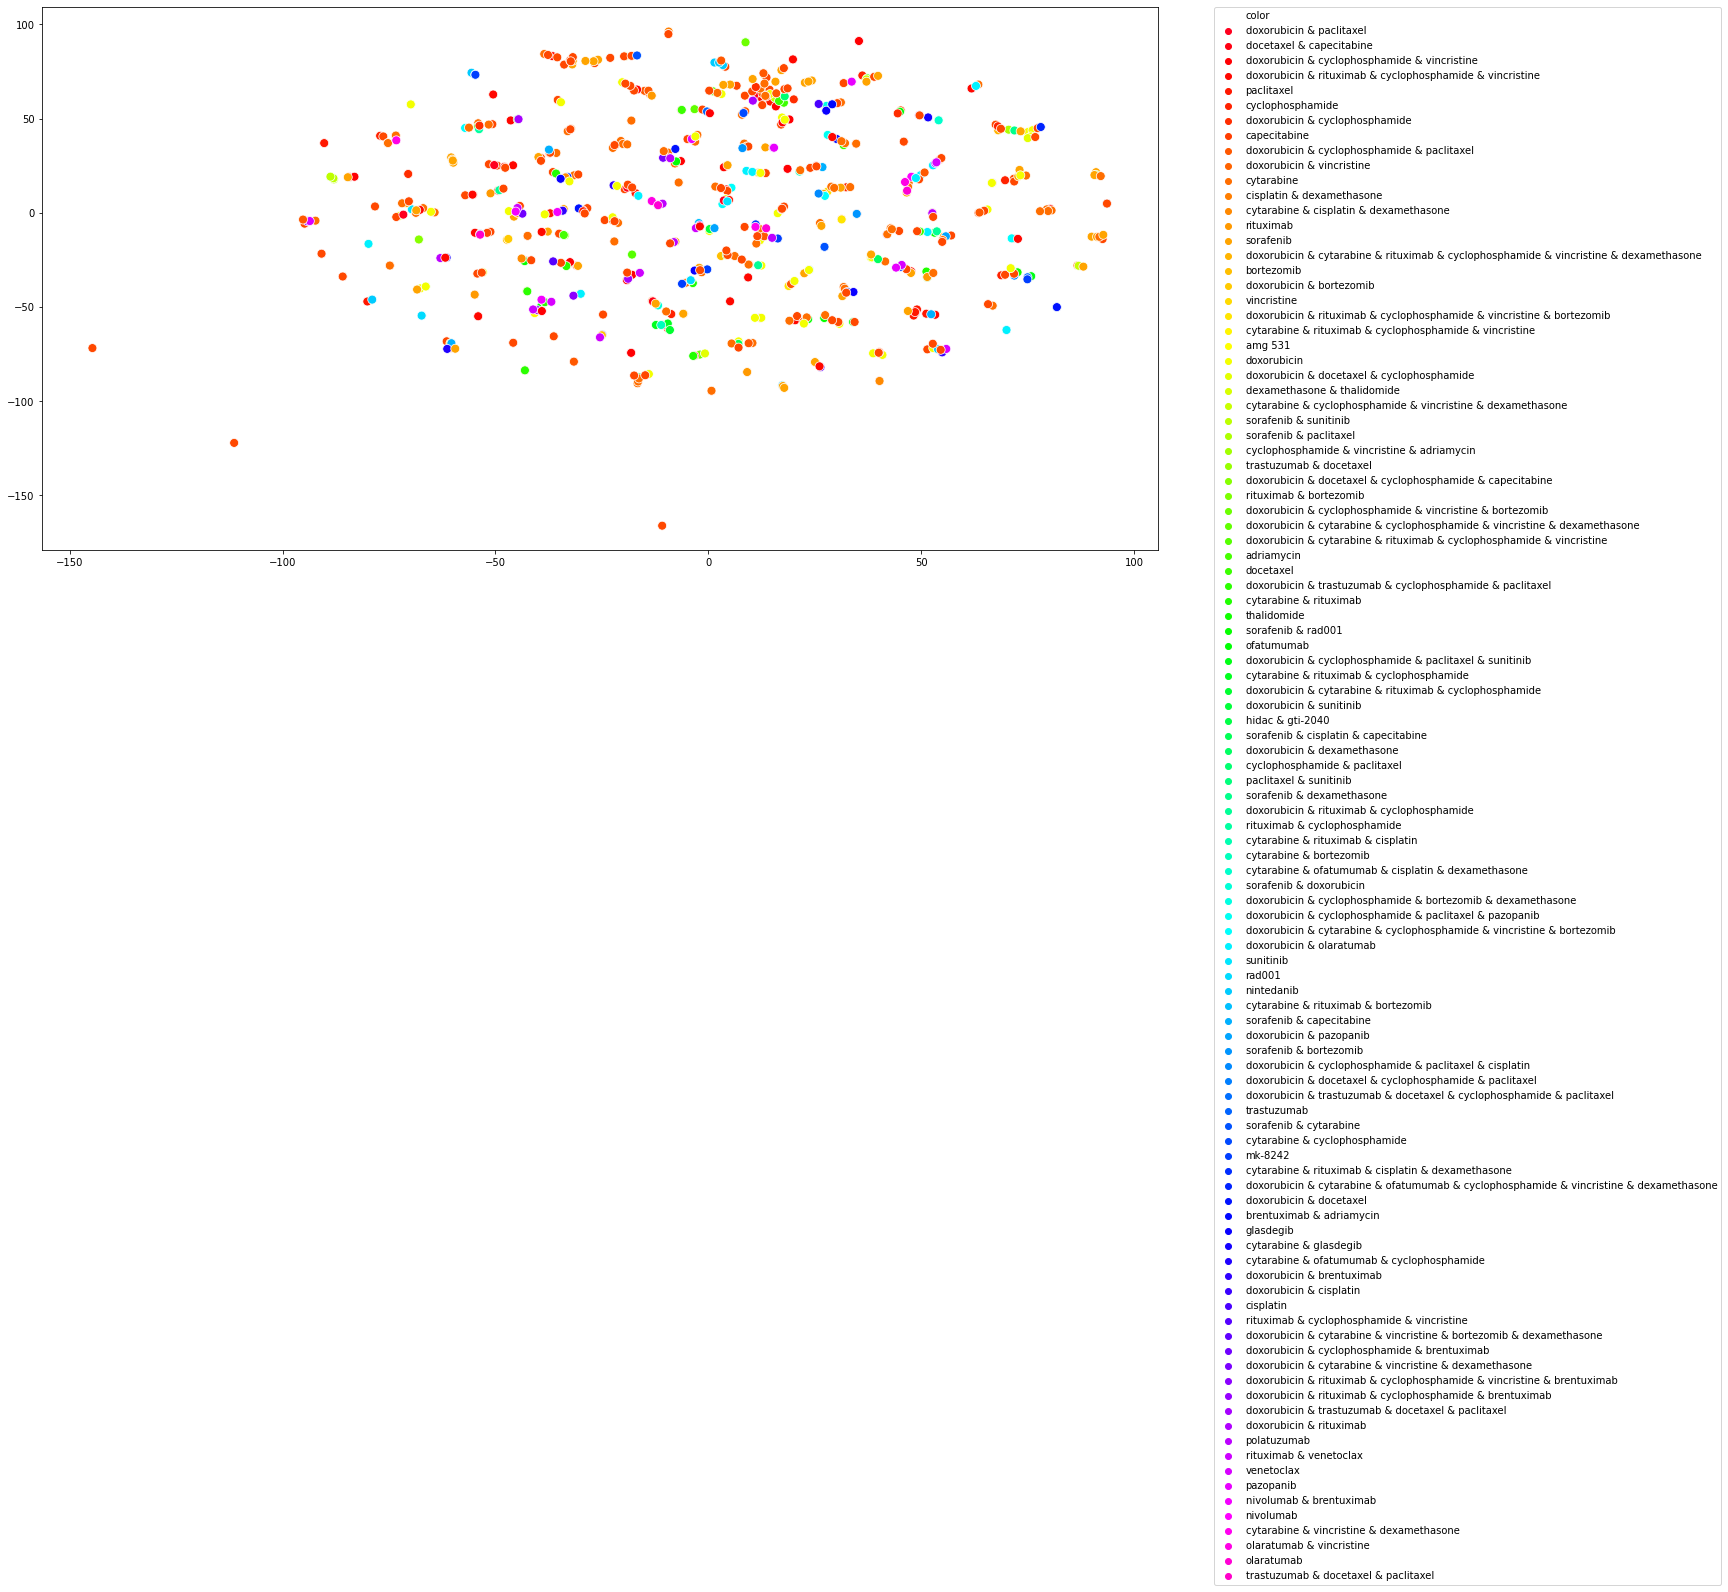

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x=x,y=y, hue =data.color, ax =ax, s=80,palette="gist_rainbow")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [33]:
data = pd.read_csv("C:\\Python\\Python38\\Projects\\Clinical_Trials\\new_dict\\6.1.21_tSNE_with_descriptions.csv")
data= data[["Study_Name","Group","Group_Description"]]
data = data.drop_duplicates("Group")

desc = pd.read_csv("C:\\Python\\Python38\\Projects\\Clinical_Trials\\new_dict\\05-01-Sorafenib_Doxorubicine_Cytarabine_node_descriptions.csv")
desc =  desc.rename(columns = {"Unnamed: 0":"Study"})
desc = desc.dropna()
desc = desc[desc["Study"].isin(tsne_data.columns)]
data = data.merge(desc,left_on='Group', right_on='Study')
data = data.sort_values("Group")
data["descriptions"]=data["descriptions"].str.lower()
data["title"]=data["title"].str.lower()
data_with_3 = data[((data["descriptions"].str.contains("sorafenib")) | (data["title"].str.contains("sorafenib"))) |
     ((data["descriptions"].str.contains("doxorubicin")) | (data["title"].str.contains("doxorubicin"))) |
     ((data["descriptions"].str.contains("cytarabine")) | (data["title"].str.contains("cytarabine")))]

(421, 2)


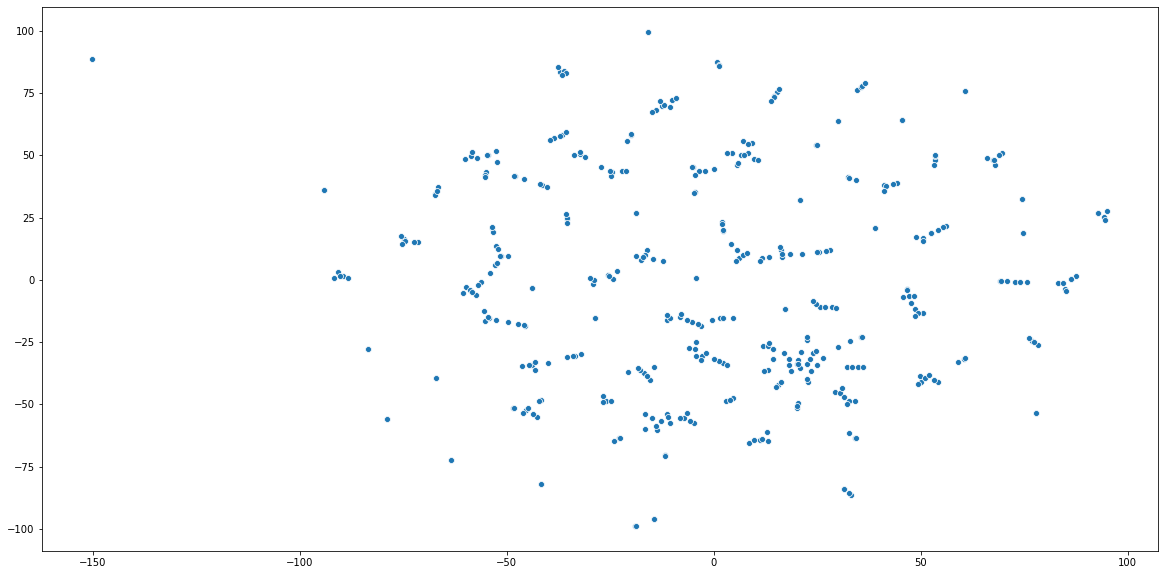

In [28]:
from sklearn.preprocessing import StandardScaler
transposed_data = tsne_data.transpose()
transposed_data=transposed_data[transposed_data.index.isin(data_with_3["Group"].values)]

scaler = StandardScaler()
scaled_samples_t = scaler.fit_transform(transposed_data)

X_embedded = TSNE(n_components=2,
perplexity =1,early_exaggeration=12, metric="cosine").fit_transform(scaled_samples_t)
print(X_embedded.shape)


x = X_embedded[:,0]
y = X_embedded[:,1]




fig, ax1 = plt.subplots(figsize=(20, 10))


sns.scatterplot(x=x,y=y)


plt.show()

In [34]:
data_with_3 = data_with_3.reset_index()

In [35]:

drugs = ["sorafenib", "doxorubicin", "cytarabine",'mk-8242','rituximab','trastuzumab','docetaxel','polatuzumab','glasdegib',
         'nintedanib','ofatumumab','cyclophosphamide','olaratumab','vincristine','amg 531','nivolumab','brentuximab','adriamycin',
         'venetoclax','paclitaxel',"hidac",'sunitinib','bortezomib','gti-2040','rad001','cisplatin','dexamethasone','thalidomide','pazopanib',
        "capecitabine"]

found_drug = []
for group in range(data_with_3.shape[0]):
    for drug in drugs:
        if drug in data_with_3.loc[group,"descriptions"] or drug in data_with_3.loc[group,"title"]:
            found_drug.append(drug)
        data_with_3.loc[group, 'color'] = " & ".join(found_drug)
    found_drug=[]
data_with_3

index                                         Study_Name          Group  \
0      127  S9912 Combination Chemo in Stage III Ovarian C...  NCT00003896-1   
1      129  Chemotherapy  Stem Cell Transplantation and Do...  NCT00006184-1   
2      130  S0016 Combination Chemotherapy With Monoclonal...  NCT00006721-2   
3      131  S0016 Combination Chemotherapy With Monoclonal...  NCT00006721-3   
4      138  Comparison of Combination Chemotherapy Regimen...  NCT00024102-2   
..     ...                                                ...            ...   
416    495  A Study of Durvalumab in Combination With R-CH...  NCT03003520-1   
417    499  PET-Directed Therapy With Pembrolizumab and Co...  NCT03226249-1   
418    500  A Study of Olaratumab (LY3012207)  Doxorubicin...  NCT03283696-1   
419    501  A Study of Olaratumab (LY3012207)  Doxorubicin...  NCT03283696-2   
420    502  A Study to Evaluate the Pharmacokinetics  Effi...  NCT03493854-1   

                                     Group_Description          Study  \
0                Paclitaxel/CDDP/Liposomal Doxorubicin  NCT00003896-1   
1                       Recipient - Chemotherapy Group  NCT00006184-1   
2                                     CHOP + Rituximab  NCT00006721-2   
3                                   CHOP + Tositumomab  NCT00006721-3   
4                           Standard Chemotherapy (AC)  NCT00024102-2   
..                                                 ...            ...   
416                                       DUR + R-CHOP  NCT03003520-1   
417  Treatment: Pembrolizumab and AVD Chemotherapy ...  NCT03226249-1   
418     Olaratumab 15 mg/kg + Doxorubicin + Ifosfamide  NCT03283696-1   
419     Olaratumab 20 mg/kg + Doxorubicin + Ifosfamide  NCT03283696-2   
420  Arm A: Pertuzumab IV + Trastuzumab IV + Chemot...  NCT03493854-1   

                                                 title  \
0                paclitaxel/cddp/liposomal doxorubicin   
1                       recipient - chemotherapy group   
2                                     chop + rituximab   
3                                   chop + tositumomab   
4                           standard chemotherapy (ac)   
..                                                 ...   
416                                       dur + r-chop   
417  treatment: pembrolizumab and avd chemotherapy ...   
418     olaratumab 15 mg/kg + doxorubicin + ifosfamide   
419     olaratumab 20 mg/kg + doxorubicin + ifosfamide   
420  arm a: pertuzumab iv + trastuzumab iv + chemot...   

                                          descriptions  \
0                    description: no description found   
1    description: induction chemotherapy with fluda...   
2    description: patients receive cyclophosphamide...   
3    description: patients receive cyclophosphamide...   
4    description: ac: cyclophosphamide (600 mg/m^2 ...   
..                                                 ...   
416  description: on day 1 of each 21-day cycle par...   
417  description: all patients get 3 cycles (21-day...   
418  description: participants received olaratumab ...   
419  description: participants received olaratumab ...   
420  description: participants received 8 cycles of...   

                                                 color  
0                             doxorubicin & paclitaxel  
1         doxorubicin & cyclophosphamide & vincristine  
2    doxorubicin & rituximab & cyclophosphamide & v...  
3         doxorubicin & cyclophosphamide & vincristine  
4                       doxorubicin & cyclophosphamide  
..                                                 ...  
416  doxorubicin & rituximab & cyclophosphamide & v...  
417       doxorubicin & cyclophosphamide & vincristine  
418                           doxorubicin & olaratumab  
419                           doxorubicin & olaratumab  
420  doxorubicin & trastuzumab & docetaxel & cyclop...  

[421 rows x 8 columns]

In [76]:
for group in range(data_with_3.shape[0]):
    if "sorafenib" in data_with_3.loc[group,"color"]:
        data_with_3.loc[group, 'color2'] = "sorafenib"
    elif "doxorubicin" in data_with_3.loc[group,"color"]:
        data_with_3.loc[group, 'color2'] = "doxorubicin"
    else:
        data_with_3.loc[group, 'color2'] = "cytarabine"

In [185]:
data_with_3

index                                         Study_Name           Group  \
0      127  S9912 Combination Chemo in Stage III Ovarian C...   NCT00003896-1   
1      129  Chemotherapy  Stem Cell Transplantation and Do...   NCT00006184-1   
2      130  S0016 Combination Chemotherapy With Monoclonal...   NCT00006721-2   
3      131  S0016 Combination Chemotherapy With Monoclonal...   NCT00006721-3   
4      138  Comparison of Combination Chemotherapy Regimen...   NCT00024102-2   
5      140  Combination Chemotherapy Plus Low-Dose Radiati...   NCT00026208-1   
6      141  Combination Chemotherapy Plus Low-Dose Radiati...   NCT00026208-2   
7      142  Four Versus Six Cycles of Cyclophosphamide/Dox...   NCT00041119-1   
8      143  Four Versus Six Cycles of Cyclophosphamide/Dox...   NCT00041119-2   
9      149  PS-341 Alone and PS-341 Plus EPOCH Chemotherap...   NCT00054665-2   
10     150  Campath-1H and EPOCH to Treat Non-Hodgkin's T-...   NCT00069238-1   
11     151  S0221 Adjuvant Doxorubicin  Cyclophosphamide  ...   NCT00070564-1   
12     152  S0221 Adjuvant Doxorubicin  Cyclophosphamide  ...   NCT00070564-2   
13     153  S0221 Adjuvant Doxorubicin  Cyclophosphamide  ...   NCT00070564-3   
14     154  S0221 Adjuvant Doxorubicin  Cyclophosphamide  ...   NCT00070564-4   
15     155  S0221 Adjuvant Doxorubicin  Cyclophosphamide  ...   NCT00070564-5   
16     156  S0221 Adjuvant Doxorubicin  Cyclophosphamide  ...   NCT00070564-6   
17     157  Surgery Plus Chemotherapy (Doxorubicin  Vincri...   NCT00071058-1   
18     509  A Survival Study in Patients With High Risk My...   NCT00071799-3   
19     510  A Survival Study in Patients With High Risk My...   NCT00071799-4   
20     512  Chemotherapy Before Autologous Stem Cell Trans...   NCT00078949-2   
21       2  BAY 43-9006 (Sorafenib) to Treat Relapsed Non-...   NCT00098254-1   
22     163  Universal Granulocyte Macrophage-colony Stimul...   NCT00101101-1   
23     165  Study of DOXIL/CAELYX (Pegylated Liposomal Dox...   NCT00103506-2   
24     166  S0433 Iodine I 131 Tositumomab  Rituximab  and...   NCT00107380-1   
25       3  Sorafenib in Treating Patients With Advanced o...   NCT00112671-1   
26     170  EPOCH-R Chemotherapy Plus Bortezomib to Treat ...   NCT00114738-1   
27       4  Sorafenib in Treating Patients With Advanced A...   NCT00126568-1   
28       5  Sorafenib Tosylate With or Without Recombinant...   NCT00126594-1   
29       6  Sorafenib Tosylate With or Without Recombinant...   NCT00126594-2   
30       7  Sorafenib Tosylate in Treating Patients With P...   NCT00131911-1   
31     519  Combination Chemotherapy and Rituximab in Trea...   NCT00133991-1   
32     174  Ixabepilone and Liposomal Doxorubicin in Advan...   NCT00182767-1   
33     175  Ixabepilone and Liposomal Doxorubicin in Advan...   NCT00182767-2   
34     176  Ixabepilone and Liposomal Doxorubicin in Advan...   NCT00182767-3   
35     177  Ixabepilone and Liposomal Doxorubicin in Advan...   NCT00182767-4   
36     178  Ixabepilone and Liposomal Doxorubicin in Advan...   NCT00182767-5   
37     179  Doxorubicin (Doxil) Combined With Rituxan  Cyc...   NCT00184002-1   
38     180  Primary Systemic Therapy in Operable/Locally A...   NCT00203502-1   
39     181  A Study of ONTAK and CHOP in Newly Diagnosed  ...   NCT00211185-1   
40      10  Sorafenib and Anastrozole in Treating Postmeno...   NCT00217399-1   
41      11  S0505 Sorafenib in Treating Patients With Adva...   NCT00217620-1   
42     184  Pyridoxine in Preventing Hand-Foot Syndrome in...   NCT00245050-1   
43     185  Pyridoxine in Preventing Hand-Foot Syndrome in...   NCT00245050-2   
44      12  Sorafenib With Either Temsirolimus or Tipifarn...   NCT00281957-1   
45      13  Sorafenib With Either Temsirolimus or Tipifarn...   NCT00281957-2   
46     522  High-Dose Immunosuppression and Autologous Tra...   NCT00288626-1   
47     186  Efficacy of the HCVIDDOXIL Regimen in Patients...   NCT00290433-1   
48     187  Study of Rituximab-HCVAD

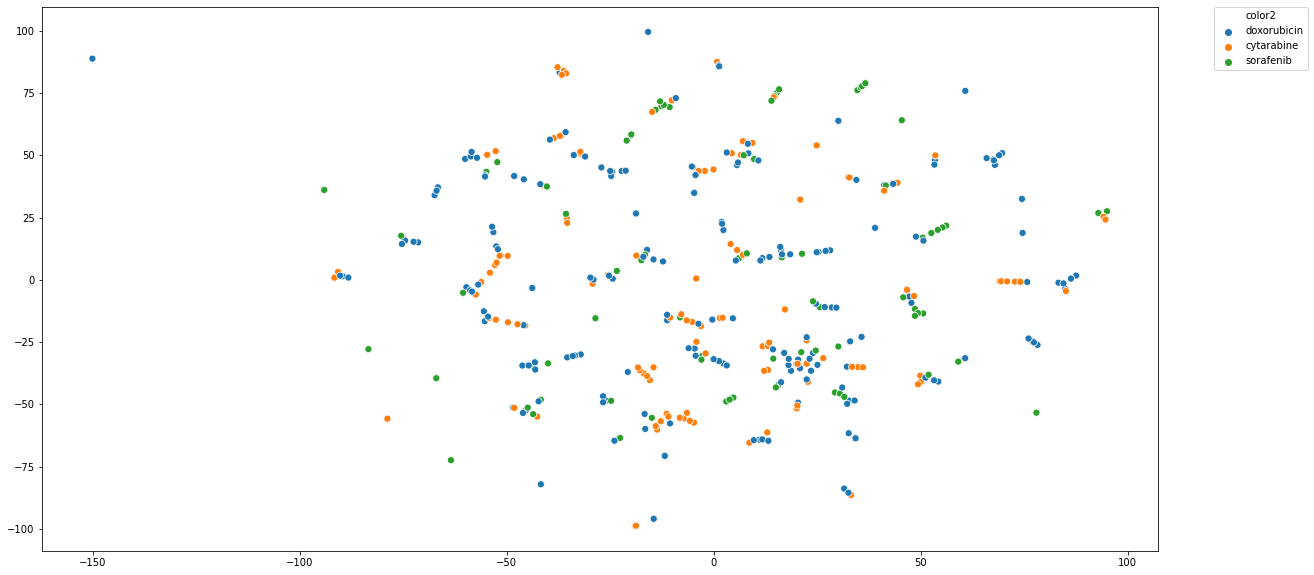

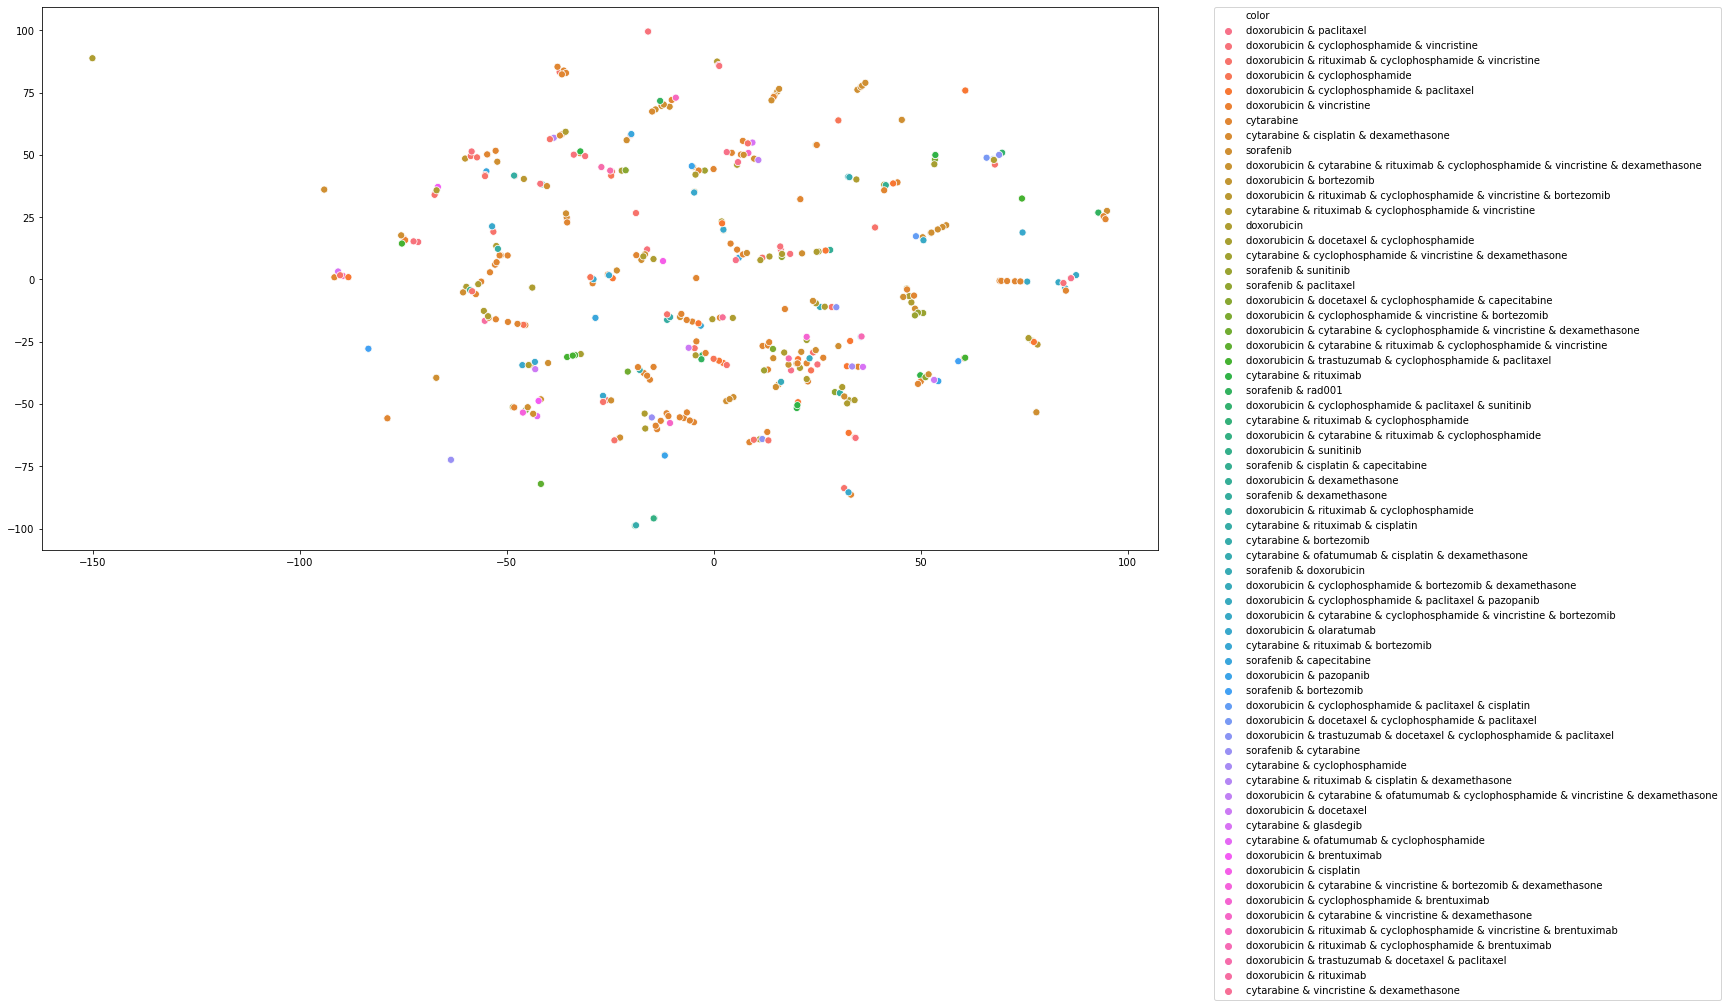

In [82]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x=x,y=y, hue =data_with_3.color2, ax =ax, s=50)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x=x,y=y, hue =data_with_3.color, ax =ax, s=50)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# fig, ax = plt.subplots(figsize=(20, 10))
# plt.scatter(x=x,y=y, c=data_with_3.color2, s=50)
# plt.legend(["aasd", "b","c"])
# # # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()



In [184]:
tsne_data

Group                   NCT00003896-1  NCT00005908-1  NCT00006184-1  \
Disease code                                                          
10000060                         0.00           0.00       0.000000   
10000636                         0.00           0.00       0.000000   
10001497                         0.00           0.00       0.000000   
10001551                         0.00           0.00       0.000000   
10001675                         0.00           0.00       0.000000   
10002167                         0.00           0.00       0.000000   
10002899                         0.00           0.00       0.000000   
10003012                         0.00           0.00       0.000000   
10003481                         0.00           0.00       0.000000   
10003504                         0.00           0.00       0.000000   
10003673                         0.00           0.00       0.000000   
10003674                         0.00           0.00       0.000000   
10005047                         0.00           0.00       0.000000   
10005265                         0.00           0.00       0.000000   
10005329                         0.00           0.00       0.000000   
10005359                         0.00           0.00       0.000000   
10005364                         0.00           0.00       0.000000   
10005630                         0.00           0.00       0.000000   
10005778                         0.00           0.00       0.000000   
10005886                         0.00           0.00       0.000000   
10006002                         0.00           3.33       0.000000   
10006259                         0.00           0.00       0.000000   
10006440                         0.00           0.00       0.000000   
10006504                         0.00           0.00       0.000000   
10006556                         0.00           0.00       0.000000   
10007541                         0.00           0.00       0.000000   
10007612                         0.00           0.00       0.000000   
10007613                         0.00           0.00       0.000000   
10007810                         0.00           0.00       0.000000   
10007839                         0.00           0.00       0.000000   
10008481                         0.00           0.00       0.000000   
10008496                         0.00           0.00       0.000000   
10008661                         0.00           0.00       0.000000   
10009845                         0.00           0.00       0.000000   
10009998                         0.00           0.00       0.000000   
10010000                         0.00           0.00       0.000000   
10010001                         0.00           0.00       0.000000   
10010004                         0.00           0.00       0.000000   
10010276                         0.00           0.00       0.000000   
10011268                         0.00           0.00       0.000000   
10011368                         0.00           0.00       0.000000   
10011655                         0.00           0.00       0.000000   
10011914                         0.00           0.00       0.000000   
10013781                         0.00           0.00       0.000000   
10013786                         0.00           0.00       0.000000   
10013832                         0.00           0.00       0.000000   
10013993                         0.00           0.00       0.000000   
10014020                         0.00           0.00       0.000000   
10014217                         0.00           0.00       0.000000   
10014222                         0.00           0.00       0.000000   
10014383                         0.00           0.00       0.000000   
10014621                         0.00           0.00       0.000000   
10014678                         0.00           0.00       0.000000   
10014698                         0.00           0.00       0.000000   
10015384                